<a id='contenidos'></a>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripción-del-proyecto" data-toc-modified-id="Descripción-del-proyecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descripción del proyecto</a></span></li><li><span><a href="#Objetivos-del-proyecto" data-toc-modified-id="Objetivos-del-proyecto-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objetivos del proyecto</a></span></li><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inicialización</a></span></li><li><span><a href="#Carga-de-datos" data-toc-modified-id="Carga-de-datos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Carga de datos</a></span></li><li><span><a href="#Preprocesamiento-de-datos" data-toc-modified-id="Preprocesamiento-de-datos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocesamiento de datos</a></span><ul class="toc-item"><li><span><a href="#Valores-nulos" data-toc-modified-id="Valores-nulos-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Valores nulos</a></span></li><li><span><a href="#Valores-duplicados" data-toc-modified-id="Valores-duplicados-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Valores duplicados</a></span></li></ul></li><li><span><a href="#Análisis-exploratorio" data-toc-modified-id="Análisis-exploratorio-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Análisis exploratorio</a></span></li><li><span><a href="#Estadísticas-para-los-operadores" data-toc-modified-id="Estadísticas-para-los-operadores-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Estadísticas para los operadores</a></span><ul class="toc-item"><li><span><a href="#Distribución-de-las-llamadas-entrantes-pérdidas" data-toc-modified-id="Distribución-de-las-llamadas-entrantes-pérdidas-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Distribución de las llamadas entrantes pérdidas</a></span></li><li><span><a href="#Distribución-del-tiempo-promedio-de-espera-para-las-llamadas-entrantes" data-toc-modified-id="Distribución-del-tiempo-promedio-de-espera-para-las-llamadas-entrantes-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Distribución del tiempo promedio de espera para las llamadas entrantes</a></span></li><li><span><a href="#Distribución-de-las-llamadas-salientes" data-toc-modified-id="Distribución-de-las-llamadas-salientes-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Distribución de las llamadas salientes</a></span></li></ul></li><li><span><a href="#Operadores-ineficientes" data-toc-modified-id="Operadores-ineficientes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Operadores ineficientes</a></span></li><li><span><a href="#Referencias" data-toc-modified-id="Referencias-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Referencias</a></span></li><li><span><a href="#Links" data-toc-modified-id="Links-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Links</a></span></li></ul></div>

## Descripción del proyecto  
El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

## Objetivos del proyecto

Trataremos de responder a las preguntas:
- **¿Qué queremos conseguir y por qué?** Obtener información de los operadores menos eficaces.
    
    
- **¿A quién le interesa el producto?** A los supervisores y las supervisores.

- **¿Qué decisiones se tomarán de acuerdo al análisis?**

*Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.*

## Inicialización  
En esta sección vamos a cargar todas las librerías a usar para realizar el estudio.

In [29]:
# Cargar todas las librerías
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_palette(palette='tab10')

[Volver a contenidos](#contenidos)
## Carga de datos  
Realizaremos la carga de las distintas fuentes de datos en dataframes. Tenemos dos archivos `'.csv'` con los datos de los operadores y costos tarifarios para los clientes. Revisaremos cuántos registros y variables tenemos en el dataset.

In [30]:
# cargar información de los operadores
telecom_dataset_us=pd.read_csv('telecom_dataset_us.csv',parse_dates=['date'])

In [31]:
# cargar información de los clientes
telecom_clients_us=pd.read_csv('telecom_clients_us.csv',parse_dates=['date_start'])

In [32]:
# mostramos información general del set de datos de los operadores
telecom_dataset_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  int64                    
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          45730 non-null  float64                  
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB


In [33]:
# mostramos parte de los datos de los operadores
telecom_dataset_us.sample(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
37012,167626,2019-10-06 00:00:00+03:00,out,False,919202.0,False,95,11460,13310
47485,168187,2019-10-23 00:00:00+03:00,out,False,937808.0,True,10,0,269
49498,168187,2019-11-26 00:00:00+03:00,out,False,937762.0,False,3,134,196
1257,166405,2019-10-18 00:00:00+03:00,out,False,882686.0,False,76,7764,8891
35101,167521,2019-11-15 00:00:00+03:00,in,False,919790.0,False,38,2820,4048


---
El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada en minutos (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada en minutos (incluido el tiempo de espera)


**Tenemos 53,902 registros y nueve columnas.** El nombre de las columnas es descriptivo y está escrito en formato **snake_case**. El tipo de datos para cada columna es el correcto, a excepción de la columna `'operator_id'` que tiene el tipo `'float64'` pero observando sus valores podemos convertirlo al tipo `'int64'`.

---

In [34]:
# mostramos información general del set de datos de los clientes
telecom_clients_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [35]:
# mostramos parte de los datos de los clientes
telecom_clients_us.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


---
El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela


**Tenemos 732 registros y tres columnas.** El nombre de las columnas es descriptivo y está escrito en formato **snake_case**. El tipo de datos para cada columna es el correcto.

---

[Volver a contenidos](#contenidos)
## Preprocesamiento de datos  
Revisaremos el dataset en busca de valores nulos, duplicados o posibles valores outliers.

[Volver a contenidos](#contenidos)
### Valores nulos  
Revisaremos las columnas de cada uno de los dataset en busca de valores nulos y en su caso los corregiremos.

In [36]:
# revisamos el dataset de los usuarios
telecom_clients_us.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

El dataset de los usuarios no presenta valores nulos.

In [37]:
# revisamos el dataset de los operadores
telecom_dataset_us.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [38]:
# revisamos el dataset para los valores nulos en la columna 'internal'
# 'internal' nos dice si la llamada fue hecha entre los operadores de un cliente, toma valores 'True' o 'False'
telecom_dataset_us[telecom_dataset_us['internal'].isna()].sample(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
37580,167626,2019-10-18 00:00:00+03:00,in,NaN,NaN,True,2,0,4
1924,166406,2019-09-02 00:00:00+03:00,in,NaN,879898.0,False,1,2,9
36828,167626,2019-10-03 00:00:00+03:00,in,NaN,919164.0,False,1,19,25
29985,167272,2019-10-09 00:00:00+03:00,in,NaN,910018.0,False,1,115,135
38358,167650,2019-11-11 00:00:00+03:00,in,NaN,NaN,True,1,0,49


In [39]:
# veamos la distribución de los valores en la columna 'internal'
telecom_dataset_us['internal'].value_counts(dropna=False)

internal
False    47621
True      6164
NaN        117
Name: count, dtype: int64

Podemos ver que es más probable el valor `'False'` por lo que estimaremos los valores nulos usando el valor `'False'`.

In [40]:
# reemplazamos los valores nulos en la columna 'internal'
telecom_dataset_us['internal'].fillna(False,inplace=True)

In [41]:
# verificamos que se haya hecho el reemplazo
telecom_dataset_us.isna().sum()

user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Ya no tenemos valores nulos en la columna `'internal'`, procedemos ahora a revisar la columna `'operador_id'`.

Probemos haciendo algunas agrupaciones para la columna `'operator_id'` con otras columnas

In [42]:
# agrupemos por 'user_id' y 'direction' para poder obtener las frecuencias de 'operator_id'
telecom_dataset_us.groupby(['user_id','direction'])['operator_id'].value_counts(dropna=False).reset_index().tail(10)

,user_id,direction,operator_id,count
1982,168601,in,952914.0,18
1983,168601,in,NaN,17
1984,168601,in,952916.0,1
1985,168601,out,952914.0,37
1986,168601,out,952916.0,4
1987,168603,in,NaN,1
1988,168603,out,959118.0,7
1989,168606,in,NaN,2
1990,168606,in,957922.0,2
1991,168606,out,957922.0,8


Notamos que no hay manera de imputar adecuadamente los valores nulos de `'operator_id'`, de tal forma que para no incurrir en errores en el cálculo de alguna estadística vamos a proceder a eliminar esos registros con valores nulos y ver la cantidad de información que perdemos.

In [43]:
# creamos un dataframe sin valores nulos
telecom_dataset_us_notna=telecom_dataset_us[telecom_dataset_us['operator_id'].notna()]
telecom_dataset_us_notna.shape

(45730, 9)

In [44]:
# revisamos el dataframe creado en busca de valores nulos
telecom_dataset_us_notna.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

Podemos notar que en el dataframe `'telecom_dataset_us_notna'` ya no tenemos valores nulos y que contamos con 45,730 registros y nueve columnas. Además, al eliminar esos 8,172 valores nulos hemos perdido aproximadamente un $\frac{8172}{53902} x 100=15.16\% $ de la información.

In [45]:
# finalmente transformemos el tipo de datos de la columna 'operator_id' a una de tipo 'int64'
telecom_dataset_us_notna['operator_id']=telecom_dataset_us_notna['operator_id'].astype('int64')

C:\Users\jaime\AppData\Local\Temp\ipykernel_8448\441981980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_dataset_us_notna['operator_id']=telecom_dataset_us_notna['operator_id'].astype('int64')


In [46]:
# obtengamos el tiempo de espera de la llamada
telecom_dataset_us_notna.loc[:,'time_waiting']=telecom_dataset_us_notna.loc[:,'total_call_duration']-telecom_dataset_us_notna.loc[:,'call_duration']

C:\Users\jaime\AppData\Local\Temp\ipykernel_8448\429995221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_dataset_us_notna.loc[:,'time_waiting']=telecom_dataset_us_notna.loc[:,'total_call_duration']-telecom_dataset_us_notna.loc[:,'call_duration']


In [47]:
# mostramos la información general del dataframe
telecom_dataset_us_notna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45730 entries, 1 to 53900
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              45730 non-null  int64                    
 1   date                 45730 non-null  datetime64[ns, UTC+03:00]
 2   direction            45730 non-null  object                   
 3   internal             45730 non-null  bool                     
 4   operator_id          45730 non-null  int64                    
 5   is_missed_call       45730 non-null  bool                     
 6   calls_count          45730 non-null  int64                    
 7   call_duration        45730 non-null  int64                    
 8   total_call_duration  45730 non-null  int64                    
 9   time_waiting         45730 non-null  int64                    
dtypes: bool(2), datetime64[ns, UTC+03:00](1), int64(6), object(1)
memory usage:

[Volver a contenidos](#contenidos)
### Valores duplicados  
Revisaremos las columnas de cada uno de los dataset en busca de valores duplicados y en su caso los corregiremos.

In [48]:
# buscamos valores nulos en los registros de los usuarios
telecom_clients_us.duplicated().sum()

0

In [49]:
# buscamos valores nulos en los registros de los operadores
telecom_dataset_us_notna.duplicated().sum()

4184

In [50]:
# eliminamos los registros duplicados en el dataframe de los operadores sin valores nulos
telecom_dataset_us_notna.drop_duplicates(inplace=True)

C:\Users\jaime\AppData\Local\Temp\ipykernel_8448\2993552585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_dataset_us_notna.drop_duplicates(inplace=True)


In [51]:
# verificamos que se hayan eliminado los duplicados
telecom_dataset_us_notna.duplicated().sum()

0

In [52]:
# veamos el tamaño total del último dataframe creado para realizar los análisis
telecom_dataset_us_notna.shape

(41546, 10)

Este último dataframe ya no contiene valores nulos ni duplicados y cada columna tiene el tipo de datos correcto. Podemos ahora proceder a realizar un análisis exploratorio. Hemos perdido en total $\frac{12356}{53902} x 100=22.9\% $ de la información.

[Volver a contenidos](#contenidos)
## Análisis exploratorio  
Realizaremos un análisis exploratorio de los datos para observar sus distribuciones y posibles valores outliers.

In [53]:
# creamos una lista con las variables a observar su distribución
variables=['calls_count','call_duration','total_call_duration','time_waiting']

In [54]:
# veamos información general de las variables 'calls_count','call_duration' y 'total_call_duration'
telecom_dataset_us_notna[variables].describe().T

,count,mean,std,min,25%,50%,75%,max
calls_count,41546.0,16.900424,59.749373,1.0,1.0,4.0,13.0,4817.0
call_duration,41546.0,1009.769172,4064.106117,0.0,0.0,106.0,770.0,144395.0
total_call_duration,41546.0,1321.592813,4785.978633,0.0,67.0,288.0,1104.0,166155.0
time_waiting,41546.0,311.823641,1175.373073,0.0,19.0,60.0,219.0,46474.0


Las diferencias tan grandes que existen entre los valores de las medias y las medianas es un indicativo que las variables presentan valores [outliers](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=Here%20are%20three%20techniques%20we%20can%20use%20to,using%20imputation%20as%20if%20they%20were%20missing%20values) y que la distribución es asimétrica hacia la derecha ([asimetría](https://www.rankia.com/diccionario/fondos-inversion/skewness
) positiva); es decir, su cola es más larga hacia la derecha y la campana de la gráfica se inclina hacia la izquierda.

Limite-inferior: -17.00     Limite-superior: 31.00


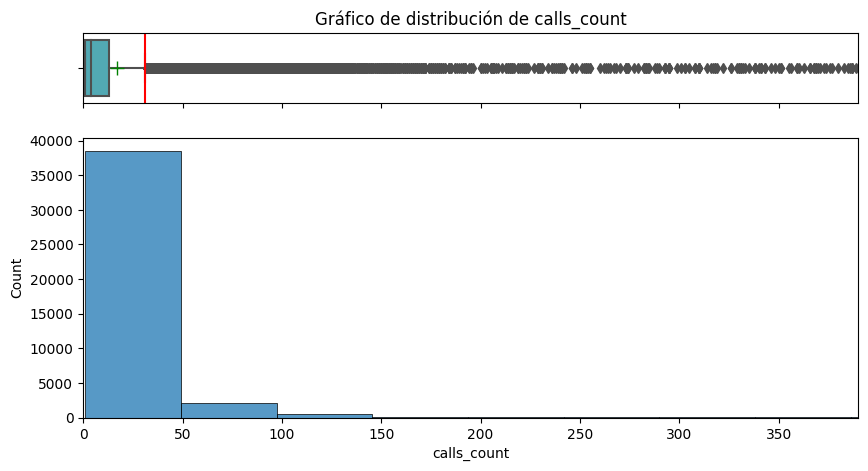

Limite-inferior: -1155.00     Limite-superior: 1925.00


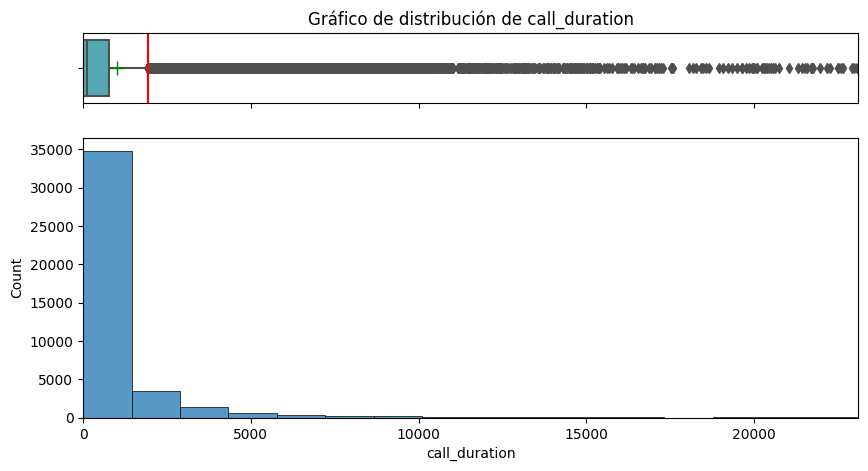

Limite-inferior: -1488.50     Limite-superior: 2659.50


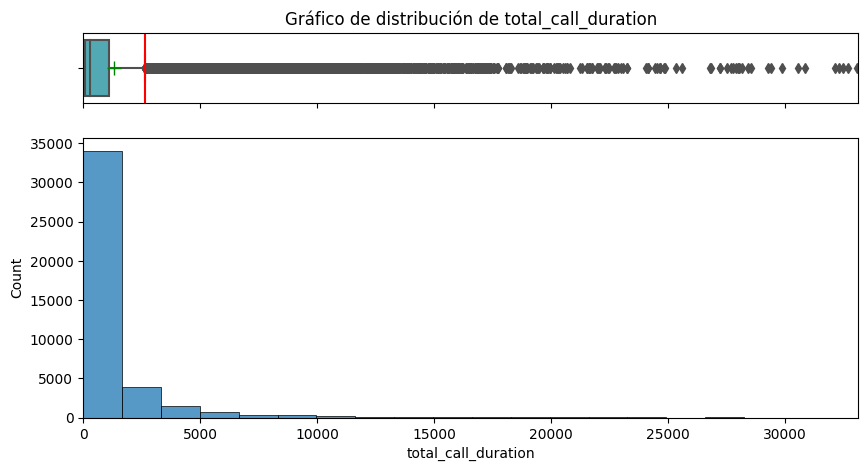

Limite-inferior: -281.00     Limite-superior: 519.00


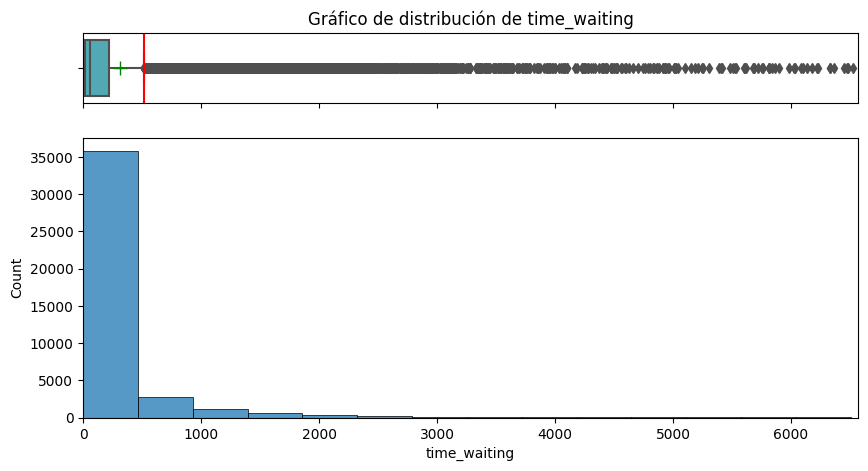

In [55]:
# creamos los gráficos 'boxplot' que incluyen los valores teóricos de los bigotes
for var in variables:
    Q1 = telecom_dataset_us_notna[var].quantile(0.25)
    Q3 = telecom_dataset_us_notna[var].quantile(0.75)
    
    # rango intercuantílico
    IQR=Q3-Q1
    # bigote superior Q3+1.5*IQR
    # bigote inferior Q1-1.5*IQR
    titulo=str(var)
    print(f'Limite-inferior: {Q1-1.5*IQR:.2f}     Limite-superior: {Q3+1.5*IQR:.2f}')  
    fig, ax = plt.subplots(2,sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)},figsize=(10,5))
    
    # gráfico boxplot
    sns.boxplot(x=var,data=telecom_dataset_us_notna,ax=ax[0],palette='YlGnBu_r',\
                   showmeans=True,meanprops={"marker": "+","markeredgecolor": "green","markersize": "10"})
    ax[0].axvline(x=Q1-1.5*IQR,color='red')
    ax[0].axvline(x=Q3+1.5*IQR,color='red')
    ax[0].set(xlabel=None)
    ax[0].set(title='Gráfico de distribución de '+titulo)
    
    # gráfico de distribución
    sns.histplot(telecom_dataset_us_notna[var],bins=100,ax=ax[1])
    plt.xlim(0,30*Q3)
    #plt.title('Valores teóricos de los limites de '+titulo)
    plt.show()

De los gráficos anteriores podemos notar que las variables `'calls_count'`, `'call_duration'`, `'total_call_duration'` y `'time_waiting'` presentan distribuciones con asimetría positiva y muchos valores outliers.

In [56]:
# veamos ahora el comportamiento de las variables 'direction', 'internal' y 'is_missed_call'
categoricas=['direction','internal','is_missed_call']

In [57]:
"""Creamos una función para graficar las variables categoricas"""
def grafica_barras(data,variable):
    """
    data=el dataframe que contiene los registros de los usuarios
    variable=la variable categorica de la cual se van a obtener las frecuencias
    """
    # agrupamos los datos y obtenemos las frecuencias
    grouped=data[variable].value_counts(normalize=True)
    grouped.name='frecuencia'
    grouped=grouped.to_frame().reset_index()
    
    # creamos la grafica de barras
    f,ax=plt.subplots(figsize=(4,4))
    sns.barplot(data=grouped,x=variable,y='frecuencia')
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label
        space = 3
        # Vertical alignment 'va'

        # Use Y value as label and format number with zero decimal place
        label = "{:.1%}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va='bottom',rotation=45)
    plt.ylim(0,grouped['frecuencia'].max()*1.3)
    plt.title('Gráfico de '+variable)
    plt.show()

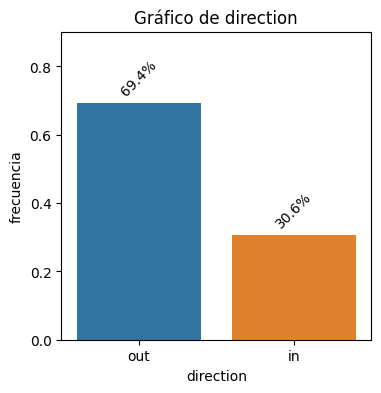

In [58]:
# creamos la gráfica para 'direction'
grafica_barras(data=telecom_dataset_us_notna,variable='direction')

Tenemos que un 69.4% de las llamadas son salientes y solo un 30.6% son entrantes.

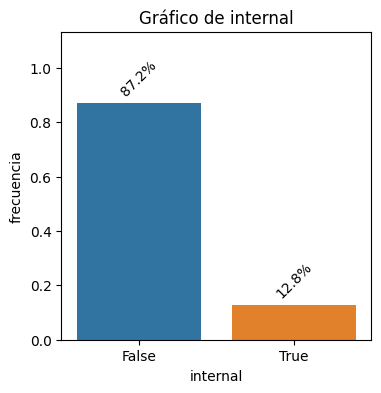

In [59]:
# creamos la gráfica para 'internal'
grafica_barras(data=telecom_dataset_us_notna,variable='internal')

Solo 12.8% de las llamadas son realizadas entre los operadores.

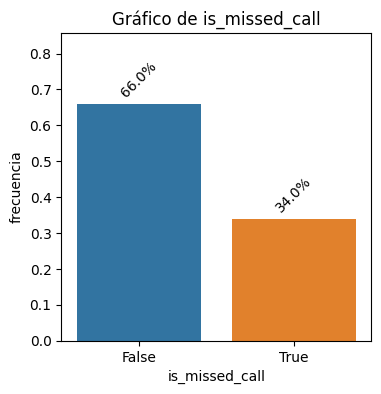

In [60]:
# creamos la gráfica para 'is_missed_call'
grafica_barras(data=telecom_dataset_us_notna,variable='is_missed_call')

El 34% de las llamadas son llamadas perdidas.

[Volver a contenidos](#contenidos)
## Estadísticas para los operadores  
Realizaremos una agrupación en el dataset `'telecom_dataset_us_notna'` por operador y obtendremos estadísticas acerca de las llamadas.

In [61]:
# para todas las llamadas agrupamos por operador
calls_by_operator=telecom_dataset_us_notna[['operator_id','direction','calls_count','call_duration','is_missed_call','time_waiting']]\
                        .groupby(['operator_id','direction']).sum()\
                        .sort_values(['is_missed_call','time_waiting'],ascending=False).reset_index()

# obtenemos la duracion promedio por llamada
calls_by_operator['mean_duration']=calls_by_operator['call_duration']/calls_by_operator['calls_count']

# obtenemos el tiempo promedio de espera por llamada
calls_by_operator['mean_waiting']=calls_by_operator['time_waiting']/calls_by_operator['calls_count']
calls_by_operator.sample(5)

,operator_id,direction,calls_count,call_duration,is_missed_call,time_waiting,mean_duration,mean_waiting
758,900746,in,26,1471,2,611,56.576923,23.500000
468,960620,out,58,2757,8,1052,47.534483,18.137931
869,937808,in,127,12866,1,1371,101.307087,10.795276
1585,905470,out,3,94,0,10,31.333333,3.333333
374,919456,out,1147,44414,12,23210,38.721883,20.235397


[Volver a contenidos](#contenidos)
### Distribución de las llamadas entrantes pérdidas

In [62]:
# obtengamos información general del set de datos de las llamadas entrantes pérdidas
calls_in_missed_operator=calls_by_operator.query('direction=="in"')
calls_in_missed_operator.describe()

,operator_id,calls_count,call_duration,is_missed_call,time_waiting,mean_duration,mean_waiting
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,923704.400531,124.405836,12631.314324,0.908488,1635.656499,102.161798,17.491612
std,22646.733795,356.450649,34048.272424,2.405363,4637.607919,103.592874,12.171988
min,879896.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.683673
25%,905153.000000,4.000000,226.250000,0.000000,62.000000,50.153237,9.398782
50%,924580.000000,17.000000,1480.500000,0.000000,255.000000,86.291667,14.430502
75%,940457.500000,78.750000,8097.750000,1.000000,1064.250000,126.035088,21.838889
max,973286.000000,4766.000000,397079.000000,28.000000,52875.000000,1799.000000,115.500000


In [63]:
# obtenemos percentiles para la cantidad de llamadas entrantes pérdidas
np.percentile(calls_in_missed_operator['is_missed_call'],[90,95,96,99])

array([ 2.  ,  4.35,  5.  , 11.47])

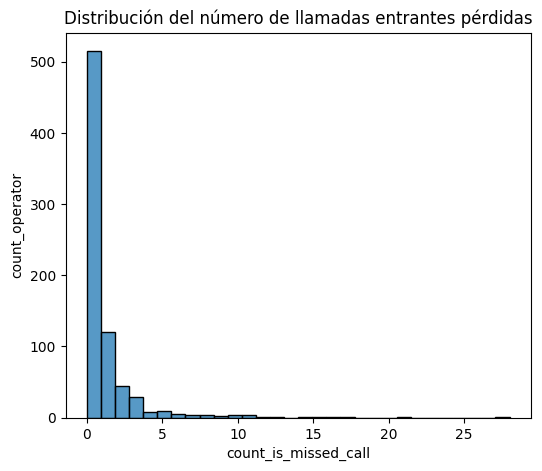

In [64]:
# veamos la distribución de las llamadas entrantes pérdidas
fig,ax=plt.subplots(figsize=(6,5))
sns.histplot(calls_in_missed_operator['is_missed_call'],bins=30)
plt.xlabel('count_is_missed_call')
plt.ylabel('count_operator')
plt.title('Distribución del número de llamadas entrantes pérdidas')
plt.show()

Podemos observar que hay muy pocos operadores con muchas llamadas entrantes pérdidas. La mayoría de los operadores tienen pocas llamadas entrantes pérdidas. **Definamos seis como la cantidad mínima de llamadas entrantes pérdidas para considerar a un operador ineficiente, el 96% de los operadores tiene a lo más cinco llamadas pérdidas.**

[Volver a contenidos](#contenidos)
### Distribución del tiempo promedio de espera para las llamadas entrantes

In [65]:
# obtenemos percentiles para el tiempo promedio de espera para las llamadas entrantes
np.percentile(calls_in_missed_operator['mean_waiting'],[90,95,99])

array([33.87011583, 41.57923977, 55.38205128])

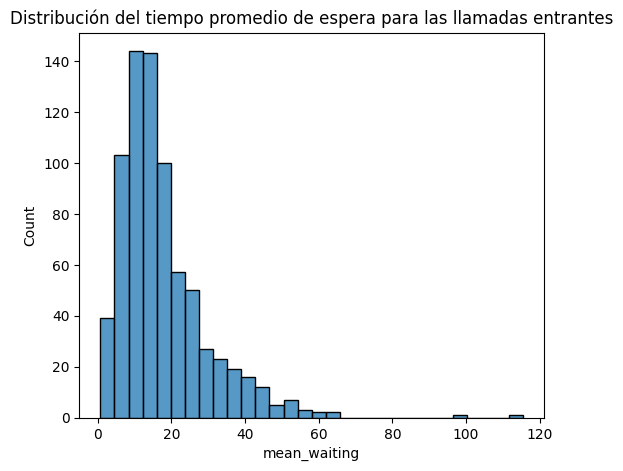

In [66]:
# veamos la distribución del tiempo promedio de espera para las llamadas entrantes
fig,ax=plt.subplots(figsize=(6,5))
sns.histplot(calls_in_missed_operator['mean_waiting'],bins=30)
plt.title('Distribución del tiempo promedio de espera para las llamadas entrantes')
plt.show()

Podemos observar que hay muy pocos operadores cuyo tiempo promedio de espera para las llamadas entrantes es mayor a 41.57. **Definamos a los operadores cuyo tiempo promedio de espera es mayor a 41.57 como un operador ineficiente.**

Con estas dos condiciones anteriores:
- **Cantidad de llamadas entrantes perdidas mayor a cinco**
- **Tiempo promedio de espera mayor a 41.57**

vamos a **considerar a un operador como ineficiente.**

[Volver a contenidos](#contenidos)
### Distribución de las llamadas salientes

In [67]:
# obtengamos información general del set de datos de las llamadas salientes
calls_out_operator=calls_by_operator.query('direction=="out"')
calls_out_operator.describe()

,operator_id,calls_count,call_duration,is_missed_call,time_waiting,mean_duration,mean_waiting
count,882.000000,882.000000,8.820000e+02,882.000000,8.820000e+02,882.000000,882.000000
mean,925658.340136,689.731293,3.676628e+04,15.221088,1.328995e+04,61.727551,15.007958
std,22862.558731,3122.953946,1.890289e+05,18.549008,7.093113e+04,81.385731,6.755690
min,879896.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,906394.500000,11.000000,3.470000e+02,2.000000,1.330000e+02,21.478459,10.253906
50%,924959.000000,90.000000,5.773500e+03,8.000000,1.314500e+03,45.719303,15.348039
75%,943630.000000,597.250000,3.134400e+04,21.000000,1.025650e+04,76.291820,19.245915
max,973120.000000,58977.000000,4.304731e+06,117.000000,1.431696e+06,1306.000000,60.000000


In [68]:
# obtenemos percentiles para la cantidad de llamadas salientes
np.percentile(calls_out_operator['calls_count'],[5,10,15,20,25])

array([ 1.,  3.,  5.,  8., 11.])

Limite-inferior: -868.38     Limite-superior: 1476.62


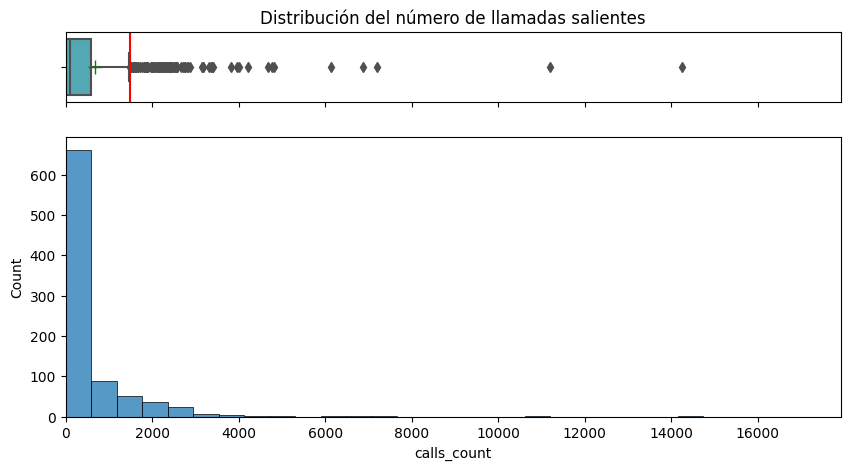

In [69]:
# veamos la distribución de las llamadas salientes

Q1 = calls_out_operator['calls_count'].quantile(0.25)
Q3 = calls_out_operator['calls_count'].quantile(0.75)
    
# rango intercuantílico
IQR=Q3-Q1
# bigote superior Q3+1.5*IQR
# bigote inferior Q1-1.5*IQR

print(f'Limite-inferior: {Q1-1.5*IQR:.2f}     Limite-superior: {Q3+1.5*IQR:.2f}')  
fig, ax = plt.subplots(2,sharex=True,
                gridspec_kw={"height_ratios": (.20, .80)},figsize=(10,5))
    
# gráfico boxplot
sns.boxplot(x='calls_count',data=calls_out_operator,ax=ax[0],palette='YlGnBu_r',\
                   showmeans=True,meanprops={"marker": "+","markeredgecolor": "green","markersize": "10"})
ax[0].axvline(x=Q1-1.5*IQR,color='red')
ax[0].axvline(x=Q3+1.5*IQR,color='red')
ax[0].set(xlabel=None)
ax[0].set(title='Distribución del número de llamadas salientes')
    
# gráfico de distribución
sns.histplot(calls_out_operator['calls_count'],bins=100,ax=ax[1])
plt.xlim(0,30*Q3)
plt.show()

Podemos observar en el gráfico anterior que hay muy pocos operadores que realizan muchas llamadas salientes. Un 15% de los operadores realizan a lo más cinco llamadas (llamadas salientes).

La distribución de las llamadas salientes para los operadores presenta valores outliers.

**Hagamos que cinco sea el número máximo de llamadas salientes realizadas para considerar a un operador ineficiente, solo el 15% de los operadores realizan a lo más cinco llamadas.**

Finalmente vamos a considerar a un operador ineficiente si cumple cualquiera de las siguientes dos condiciones:
1. **Cantidad de llamadas entrantes perdidas mayor a cinco y tiempo promedio de espera mayor a 41.57**
1. **Tiene a los más cinco llamadas salientes**

Etiquetemos a los operadores ineficientes en el set de datos `calls_by_operator`. Para ello vamos a crear dos columnas nuevas, una para cada condición.

In [70]:
# creamos una función para marcar a los operadores ineficientes según las llamadas salientes realizadas
def operator_inefficient_calls_out(row):
    """
    Esta función crea una columna para marcar a los operadores ineficientes en llamadas salientes
    data=el dataframe que contiene las estadísticas para los operadores y todo tipo de llamadas
    """
    
    condicion_1=calls_count_out
    if row['direction']=="out" and row['calls_count']<condicion_1:
        eficiencia='inefficient'
    else:
        eficiencia='efficient'
    return eficiencia

In [71]:
# definimos la cantidad de llamadas salientes para considerar a un operador como 'ineficiente', es ineficiente si es menor a
calls_count_out=6

In [72]:
# marcamos a los operadores según la cantidad de llamadas salientes realizadas
calls_by_operator['calls_count_out']=calls_by_operator.apply(operator_inefficient_calls_out,axis=1)

In [73]:
# mostramos parte de los datos
calls_by_operator.sample(5)

,operator_id,direction,calls_count,call_duration,is_missed_call,time_waiting,mean_duration,mean_waiting,calls_count_out
378,944220,in,265,35981,12,9558,135.777358,36.067925,efficient
707,955082,out,14,148,3,69,10.571429,4.928571,efficient
725,907502,in,242,12136,2,4855,50.148760,20.061983,efficient
1148,884412,in,18,1820,0,750,101.111111,41.666667,efficient
1370,899892,in,3,191,0,95,63.666667,31.666667,efficient


In [74]:
""" creamos una función para marcar a los operadores ineficientes según las llamadas entrantes perdidas y 
tiempo promedio de espera """
def operator_inefficient_calls_missed(row):
    """
    Esta función crea una columna para marcar a los operadores ineficientes en llamadas entrantes perdidas y 
    tiempo promedio de espera
    data=el dataframe que contiene las estadísticas para los operadores y todo tipo de llamadas
    """
    
    # condicion de cantidad de llamadas perdidas
    condicion_1=calls_in_missed
    
    # condicion de tiempo promedio de espera
    condicion_2=mean_time_waiting
    
    if row['direction']=="in" and row['is_missed_call']>condicion_1 and row['mean_waiting']>condicion_2:
        eficiencia='inefficient'
    else:
        eficiencia='efficient'
    return eficiencia

In [75]:
# definimos la cantidad de llamadas perdidas para un operador ineficiente, es ineficiente si es mayor a
calls_in_missed=5

# definimos el tiempo promedio de espera para un operador ineficiente, es ineficiente si es mayor a
mean_time_waiting=41.57

In [76]:
# marcamos a los operadores según la cantidad de llamadas entrantes perdidas y el tiempo promedio de espera
calls_by_operator['calls_missed_time_waiting']=calls_by_operator.apply(operator_inefficient_calls_missed,axis=1)

In [77]:
# finalmente creamos una función para saber si un operador es eficiente o ineficiente
def efficient(condicion_1,condicion_2):
    return True if condicion_1=='efficient' and condicion_2=='efficient' else False

In [78]:
# creamos una columna que nos diga si un operador es eficiente o no para cualquiera de las dos condiciones
calls_by_operator['eficiente']=calls_by_operator.apply(lambda x:efficient(x['calls_count_out'],x['calls_missed_time_waiting']),axis=1)

In [79]:
# mostramos parte de los datos
calls_by_operator.sample(10)

,operator_id,direction,calls_count,call_duration,is_missed_call,time_waiting,mean_duration,mean_waiting,calls_count_out,calls_missed_time_waiting,eficiente
1466,936382,in,1,78,0,39,78.000000,39.000000,efficient,efficient,True
906,939224,in,32,1402,1,515,43.812500,16.093750,efficient,efficient,True
1293,938432,in,9,1335,0,184,148.333333,20.444444,efficient,efficient,True
715,922486,out,5,12,3,12,2.400000,2.400000,inefficient,efficient,False
1551,947596,out,1,56,0,16,56.000000,16.000000,inefficient,efficient,False
562,945728,out,87,1809,5,1717,20.793103,19.735632,efficient,efficient,True
1296,908300,in,3,29,0,169,9.666667,56.333333,efficient,efficient,True
481,919188,out,831,47126,7,18300,56.709988,22.021661,efficient,efficient,True
644,908958,in,952,104421,3,26062,109.685924,27.376050,efficient,efficient,True
1627,972460,in,1,14,0,4,14.000000,4.000000,efficient,efficient,True


[Volver a contenidos](#contenidos)
## Operadores ineficientes

In [80]:
# veamos la cantidad de operadores ineficientes
calls_by_operator['eficiente'].value_counts()

eficiente
True     1490
False     146
Name: count, dtype: int64

In [81]:
# operadores ineficientes por la cantidad de llamadas salientes
calls_by_operator['calls_count_out'].value_counts()

calls_count_out
efficient      1491
inefficient     145
Name: count, dtype: int64

In [82]:
# operadores ineficientes por la cantidad de llamadas entrantes perdidas y tiempo promedio de espera
calls_by_operator['calls_missed_time_waiting'].value_counts()

calls_missed_time_waiting
efficient      1635
inefficient       1
Name: count, dtype: int64

Dadas las condiciones:
1. **Cantidad de llamadas entrantes perdidas mayor a cinco y tiempo promedio de espera mayor a 41.57**
1. **Tiene a los más cinco llamadas salientes**

Hay 146 operadores ineficientes.

In [83]:
# finalmente vamos a crear un archivo 'csv' que contenga la información final del dataframe 'calls_by_operator'
#calls_by_operator.to_csv('calls_by_operator.csv')

In [84]:
#telecom_dataset_us_notna.to_csv('telecom_dataset_us_notna')

[Volver a contenidos](#contenidos)
## Referencias

1. Operadores móviles virtuales:
https://selectra.mx/celular/operadores-moviles-virtuales#Operadores%20M%C3%B3viles%20Virtuales%20Con%20Red%20de%20Movistar

    - Me ayudó a saber que es un operador móvil y el tipo de servicios que ofrece.
    
    
1. Análisis del Mercado de OMVs 2021: https://www.ift.org.mx/sites/default/files/contenidogeneral/estadisticas/presentacionejecutivaomvs2021.pdf

    - Me ayudó a conocer la situación del mercado de los operadores móviles en el mundo a partir del año 2021.
    
    
1. Asimetría:
https://www.rankia.com/diccionario/fondos-inversion/skewness

    - Me ayudó a entender la asimetría de los datos y cómo detectarla.
    

1. Outliers:
https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=Here%20are%20three%20techniques%20we%20can%20use%20to,using%20imputation%20as%20if%20they%20were%20missing%20values

    - Me ayudó a entender que es un outlier y cómo detectarlo usando python.
    
    
1. Funciones Apply y lambda:
https://www.delftstack.com/es/howto/python-pandas/apply-lambda-functions-to-pandas-dataframe/

    - Me ayudó a entender las funciones apply y lambda y su aplicación en las columnas de un dataframe.

[Volver a contenidos](#contenidos)
## Links
[Presentación](https://github.com/JaimeGalanC/Proyecto_telecomunicaciones.git)

[Dashboard](https://public.tableau.com/app/profile/jaime.galanc/viz/callmemaybe/Dashboard1?publish=yes)